In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

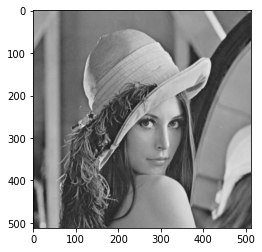

In [19]:
lena = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)

In [20]:
def padding(before, size = 1):
    h, w  = before.shape
    after = np.zeros((h + size * 2, w + size * 2))
    # Fill Middle
    for r in range(size, size + h):
        for c in range(size, size + w):
            after[r][c] = before[r - size][c - size]
    
    # Fill Top/Bottom Edge
    for c in range(size, size + w):
        for r in range(0, size):
            after[r][c] = before[0][c - size]
        for r in range(h + size, h + size * 2):
            after[r][c] = before[h - 1][c - size]
    
    # Fill Left/Right Edge
    for r in range(size, size + h):
        for c in range(0, size):
            after[r][c] = before[r - size][0]
        for c in range(w + size, w + size * 2):
            after[r][c] = before[r - size][w - 1]

    # Fill Top-Left/Top-Right Corner
    for r in range(0, size):
        for c in range(0, size):
            after[r][c] = before[0][0]
        for c in range(w + size, w + size * 2):
            after[r][c] = before[0][w - 1]

    # Fill Bottom-Left/Bottom-Right Corner
    for r in range(h + size , h + size * 2):
        for c in range(0, size):
            after[r][c] = before[h - 1][0]
        for c in range(w + size, w + size * 2):
            after[r][c] = before[h - 1][w - 1]

    # Return
    return after

In [21]:
def zero_crossing(lena, mask, thres = 15):
    h, w = lena.shape
    m = mask.shape[0] // 2

    pad_lena = padding(lena, m)
    lap_tmp = np.zeros((h, w))
    
    for r in range(m, h + m):
        for c in range(m, w + m):
            gradient = np.sum( \
                pad_lena[(r-m):(r+m+1), c-m:(c+m+1)] * mask)
            if (gradient >= thres):
                lap_tmp[r - m][c - m] = 1
            elif (gradient <= -thres):
                lap_tmp[r - m][c - m] = -1
            else:
                lap_tmp[r - m][c - m] = 0

    pad_lap = padding(lap_tmp, 1)
    after = np.zeros((h, w))

    for r in range(1, h + 1):
        for c in range(1, w + 1):
            if (pad_lap[r][c] >= 1) and (pad_lap[r-1:r+2, c-1:c+2] == -1).any():
                after[r - 1][c - 1] = 0
            else:
                after[r - 1][c - 1] = 255

    return after

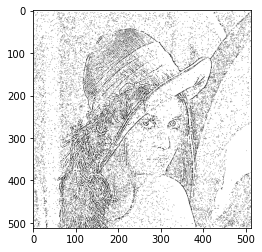

In [22]:
def Laplacian1(lena, thres=15):
    mask = np.array([   [0,  1, 0],
                        [1, -4, 1],
                        [0,  1, 0]])
    after = zero_crossing(lena, mask, thres)
    plt.imshow(after, cmap='gray', vmin=0, vmax=255)
    cv2.imwrite("lena-Laplacian-1-15.bmp", after)
    cv2.imwrite("lena-Laplacian-1-15.png", after)

Laplacian1(lena)

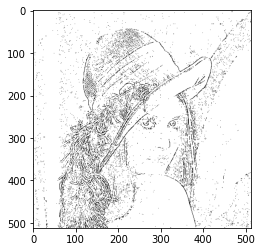

In [23]:
def Laplacian2(lena, thres=15):
    mask = 1/3 * np.array([ [1,  1, 1],
                            [1, -8, 1],
                            [1,  1, 1]])
    after = zero_crossing(lena, mask, thres)
    plt.imshow(after, cmap='gray', vmin=0, vmax=255)
    cv2.imwrite("lena-Laplacian-2-15.bmp", after)
    cv2.imwrite("lena-Laplacian-2-15.png", after)

Laplacian2(lena)

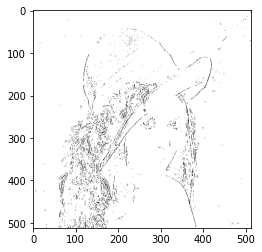

In [24]:
def MinVarLaplacian(lena, thres=20):
    mask = 1/3 * np.array([ [ 2, -1,  2],
                            [-1, -4, -1],
                            [ 2, -1,  2]])
    after = zero_crossing(lena, mask, thres)
    plt.imshow(after, cmap='gray', vmin=0, vmax=255)
    cv2.imwrite("lena-Min-Var-Laplacian-20.bmp", after)
    cv2.imwrite("lena-Min-Var-Laplacian-20.png", after)

MinVarLaplacian(lena)

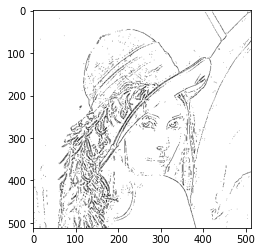

In [25]:
def LaplacianOfGaussian(lena, thres=3000):
    mask = np.array([   [ 0,  0,   0,  -1,  -1,  -2,  -1,  -1,   0,  0,  0],
                        [ 0,  0,  -2,  -4,  -8,  -9,  -8,  -4,  -2,  0,  0],
                        [ 0, -2,  -7, -15, -22, -23, -22, -15,  -7, -2,  0],
                        [-1, -4, -15, -24, -14,  -1, -14, -24, -15, -4, -1],
                        [-1, -8, -22, -14,  52, 103,  52, -14, -22, -8, -1],
                        [-2, -9, -23,  -1, 103, 178, 103,  -1, -23, -9, -2],
                        [-1, -8, -22, -14,  52, 103,  52, -14, -22, -8, -1],
                        [-1, -4, -15, -24, -14,  -1, -14, -24, -15, -4, -1],
                        [ 0, -2,  -7, -15, -22, -23, -22, -15,  -7, -2,  0],
                        [ 0,  0,  -2,  -4,  -8,  -9,  -8,  -4,  -2,  0,  0],
                        [ 0,  0,   0,  -1,  -1,  -2,  -1,  -1,   0,  0,  0]])
    after = zero_crossing(lena, mask, thres)
    plt.imshow(after, cmap='gray', vmin=0, vmax=255)
    cv2.imwrite("lena-Laplacian-Of-Gaussian-3000.bmp", after)
    cv2.imwrite("lena-Laplacian-Of-Gaussian-3000.png", after)

LaplacianOfGaussian(lena)

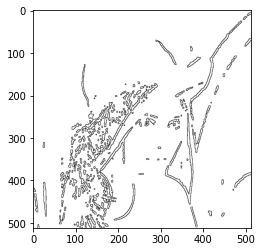

In [26]:
def DifferenceOfGaussian(lena, thres=1):
    mask = np.array([   [-1,  -3,  -4,  -6,  -7,   -8,  -7,  -6,  -4,  -3, -1],
                        [-3,  -5,  -8, -11, -13,  -13, -13, -11,  -8,  -5, -3],
                        [-4,  -8, -12, -16, -17,  -17, -17, -16, -12,  -8, -4],
                        [-6, -11, -16, -16,   0,   15,   0, -16, -16, -11, -6],
                        [-7, -13, -17,   0,  85,  160,  85,   0, -17, -13, -7],
                        [-8, -13, -17,  15,  160, 283, 160,  15, -17, -13, -8],
                        [-7, -13, -17,   0,  85,  160,  85,   0, -17, -13, -7],
                        [-6, -11, -16, -16,  0,    15,   0, -16, -16, -11, -6],
                        [-4,  -8, -12, -16, -17,  -17, -17, -16, -12,  -8, -4],
                        [-3,  -5,  -8, -11, -13,  -13, -13, -11,  -8,  -5, -3],
                        [-1,  -3,  -4,  -6,  -7,   -8,  -7,  -6,  -4,  -3, -1]])
    after = zero_crossing(lena, mask, thres)
    plt.imshow(after, cmap='gray', vmin=0, vmax=255)
    cv2.imwrite("lena-Differnece-Of-Gaussian-1.bmp", after)
    cv2.imwrite("lena-Differnece-Of-Gaussian-1.png", after)

DifferenceOfGaussian(lena)